In [65]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [75]:
#Lecture des fichiers input (X_train et X_test) et output (y_train et y_train)
X_train = pd.read_csv("X_train.txt",header=None)
y_train = pd.read_csv("y_train.txt",header=None)
X_test = pd.read_csv("X_test.txt",header=None)
y_test = pd.read_csv("y_test.txt",header=None)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7000, 6) (70, 1) (3500, 6) (35, 1)


In [76]:
x_train = np.array(X_train)
ytrain = np.array(y_train)
x_test = np.array(X_test)
ytest = np.array(y_test)
print(x_train.shape,ytrain.shape,x_test.shape,ytest.shape)

(7000, 6) (70, 1) (3500, 6) (35, 1)


In [77]:
x_train = x_train.reshape((70, 100,6))
ytrain = to_categorical(ytrain)
x_test = x_test.reshape(35,100,6)
ytest = to_categorical(ytest)
print(x_train.shape,ytrain.shape,x_test.shape,ytest.shape)

(70, 100, 6) (70, 7) (35, 100, 6) (35, 7)


In [84]:
model = Sequential()

model.add(LSTM(units=70, return_sequences = True, input_shape =(x_train.shape[1],6)))
model.add(Dropout(0.596602))
model.add(LSTM(units=50))
model.add(Dropout(0.2854))

model.add(Dense(ytrain.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])      

In [85]:
epochs = 20
batch_size = 7
#model.fit(x_train,ytrain,epochs=epochs,batch_size=batch_size)
history = model.fit(x_train,ytrain,validation_data = (x_test,ytest),epochs=epochs,batch_size=batch_size)

Train on 70 samples, validate on 35 samples
Epoch 1/20
70/70 [==============================] - 7s 102ms/step - loss: 1.9155 - acc: 0.2000 - val_loss: 1.5114 - val_acc: 0.5429
Epoch 2/20
70/70 [==============================] - 2s 23ms/step - loss: 1.4783 - acc: 0.5857 - val_loss: 1.1304 - val_acc: 0.9429
Epoch 3/20
70/70 [==============================] - 2s 22ms/step - loss: 1.1757 - acc: 0.8143 - val_loss: 0.8373 - val_acc: 0.9429
Epoch 4/20
70/70 [==============================] - 2s 22ms/step - loss: 0.8553 - acc: 0.8857 - val_loss: 0.6181 - val_acc: 0.9714
Epoch 5/20
70/70 [==============================] - 2s 22ms/step - loss: 0.6672 - acc: 0.9143 - val_loss: 0.4381 - val_acc: 0.9714
Epoch 6/20
70/70 [==============================] - 1s 21ms/step - loss: 0.4395 - acc: 0.9286 - val_loss: 0.3282 - val_acc: 1.0000
Epoch 7/20
70/70 [==============================] - 1s 21ms/step - loss: 0.3182 - acc: 1.0000 - val_loss: 0.2445 - val_acc: 1.0000
Epoch 8/20
70/70 [====================

In [86]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [87]:
model.evaluate(x_test,ytest,batch_size=batch_size)

35/35 [==============================] - 0s 4ms/step


[0.031949696317315104, 1.0]

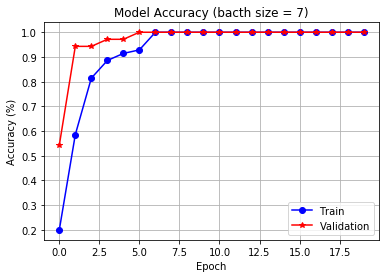

In [89]:
# summarize history for accuracy
plt.plot(history.history['acc'],'-bo')
plt.plot(history.history['val_acc'],'-r*')
plt.title('Model Accuracy (bacth size = 7)')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
fig1 = plt.gcf()
fig1.savefig('modelAccuracy.png',dpi=300)
plt.show()

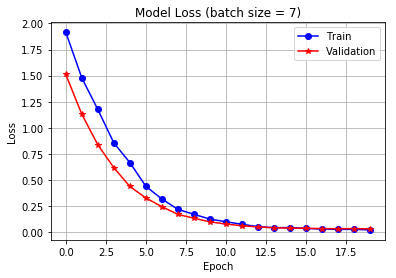

In [90]:
# summarize history for loss
plt.plot(history.history['loss'],'-bo')
plt.plot(history.history['val_loss'],'-r*')
plt.title('Model Loss (batch size = 7)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
fig2 = plt.gcf()
fig2.savefig('modelLoss.png',dpi=300)
plt.show()